In [1]:
cd ..

/home/jovyan/Capstone/Github_my_version


# Pipelines

## Import packages and load data

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA, FastICA
from sklearn.svm import SVR, SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv("data/combined_vertical_train")
apple_test = pd.read_csv("data/aapl_test")
msft_test = pd.read_csv("data/msft_test")
amzn_test = pd.read_csv("data/amzn_test")

In [4]:
apple_test = apple_test.set_index("Date")
amzn_test = amzn_test.set_index("Date") 
msft_test = msft_test.set_index("Date")

In [5]:
train = train.drop('Unnamed: 0', 1)

In [6]:
y_train = train['targets'].as_matrix()
X_train = train.drop('targets', 1)

apple_y_test = apple_test['targets'].as_matrix()
apple_X_test = apple_test.drop('targets', 1)

amzn_y_test = amzn_test['targets'].as_matrix()
amzn_X_test = amzn_test.drop('targets', 1)

msft_y_test = msft_test['targets'].as_matrix()
msft_X_test = msft_test.drop('targets', 1)

In [7]:
scaled = StandardScaler()
X_train = scaled.fit_transform(X_train)

apple_scaled = StandardScaler()
apple_X_test = apple_scaled.fit_transform(apple_X_test)

amzn_scaled = StandardScaler()
amzn_X_test = amzn_scaled.fit_transform(amzn_X_test)

In [8]:
msft_y_test.shape

(881,)

In [9]:
msft_X_test.shape

(881, 98)

In [10]:
#for signals in test['targets']:
#    if signals >= 0.75:
#        test.loc[test['targets'] == signals, 'targets_hold'] = 0
#        test.loc[test['targets'] == signals, 'targets_buy'] = 1
#        test.loc[test['targets'] == signals, 'targets_sell'] = 0
#        test.loc[test['targets'] == signals, 'targets'] = 1
#    if signals <= 0.25:
#        test.loc[test['targets'] == signals, 'targets_hold'] = 0
#        test.loc[test['targets'] == signals, 'targets_buy'] = 0
#        test.loc[test['targets'] == signals, 'targets_sell'] = 1
#        test.loc[test['targets'] == signals, 'targets'] = 0
#    elif signals > 0.25 and signals < 0.75:
#        test.loc[test['targets'] == signals, 'targets_hold'] = 1
#        test.loc[test['targets'] == signals, 'targets_buy'] = 0
#        test.loc[test['targets'] == signals, 'targets_sell'] = 0
#        test.loc[test['targets'] == signals, 'targets'] = 0.5
#        
#for signals in train['targets']:
#    if signals >= 0.75:
#        train.loc[train['targets'] == signals, 'targets_hold'] = 0
#        train.loc[train['targets'] == signals, 'targets_buy'] = 1
#        train.loc[train['targets'] == signals, 'targets_sell'] = 0
#        train.loc[train['targets'] == signals, 'targets'] = 1
#    if signals <= 0.25:
#        train.loc[train['targets'] == signals, 'targets_hold'] = 0
#        train.loc[train['targets'] == signals, 'targets_buy'] = 0
#        train.loc[train['targets'] == signals, 'targets_sell'] = 1
#        train.loc[train['targets'] == signals, 'targets'] = 0
#    elif signals > 0.25 and signals < 0.75:
#        train.loc[train['targets'] == signals, 'targets_hold'] = 1
#        train.loc[train['targets'] == signals, 'targets_buy'] = 0
#        train.loc[train['targets'] == signals, 'targets_sell'] = 0
#        train.loc[train['targets'] == signals, 'targets'] = 0.5

In [11]:
X_train.shape

(7935, 96)

In [12]:
apple_X_test.shape

(881, 96)

In [13]:
y_train.shape

(7935,)

In [14]:
apple_y_test.shape

(881,)

## Retry of Baseline

In [23]:
rf_pipe_params = {"kpca__n_components": np.arange(1,40, 5, dtype = int),
                  "model__n_estimators": [10, 50, 100]}

rf_pipe = Pipeline([("scaler", StandardScaler()),
                     ("kpca", KernelPCA()),
                     ("model", RandomForestRegressor())])



lasso_pipe = Pipeline([("scaler", StandardScaler()),
                     ("kpca", KernelPCA()),
                     ("model", Lasso())])

lasso_pipe_params = {"kpca__n_components": np.arange(1,40, 5, dtype = int),
                  "model__alpha": np.logspace(-2, 3, 5)}

In [24]:
#Random forest pipeline
rf_gs = GridSearchCV(rf_pipe, rf_pipe_params,
                     cv = 3,
                     verbose = 1)
rf_gs.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed: 34.4min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kpca', KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
     fit_inverse_transform=False, gamma=None, kernel='linear',
     kernel_params=None, max_iter=None, n_components=None, n_jobs=1,
     ran...timators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kpca__n_components': array([ 1,  6, 11, 16, 21, 26, 31, 36]), 'model__n_estimators': [10, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [25]:
rf_gs.best_estimator_.fit(X_train, y_train)
rf_gs.best_estimator_.score(apple_X_test, apple_y_test)

0.13743469023100541

In [26]:
rf_gs.best_estimator_.score(X_train, y_train)

0.96724476207709653

In [27]:
rf_gs.best_params_

{'kpca__n_components': 26, 'model__n_estimators': 50}

In [28]:
pred = rf_gs.best_estimator_.predict(apple_X_test)
actual = apple_y_test

In [29]:
mean_absolute_error(actual, pred)

0.22572437949268348

In [30]:
mean_squared_error(actual, pred)

0.071555099835778846

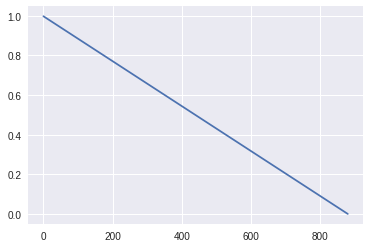

In [31]:
plt.plot(actual)

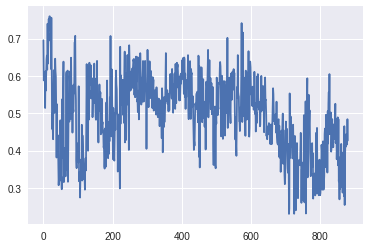

In [32]:
plt.plot(pred)

In [33]:
rf_gs.best_estimator_.score(amzn_X_test, amzn_y_test)

-0.097184289138506186

In [34]:
pred = rf_gs.best_estimator_.predict(amzn_X_test)
actual = amzn_y_test
mean_absolute_error(actual, pred)

0.2609433792694878

In [35]:
mean_squared_error(actual, pred)

0.091417881445256297

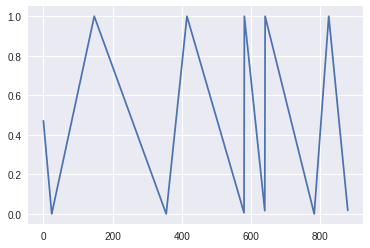

In [36]:
plt.plot(actual)

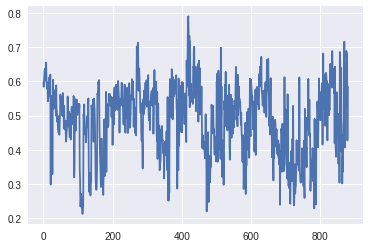

In [37]:
plt.plot(pred)

In [38]:
lasso_gs = GridSearchCV(lasso_pipe, lasso_pipe_params,
                     cv = 3,
                     verbose = 1)

lasso_gs.fit(X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed: 42.1min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kpca', KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
     fit_inverse_transform=False, gamma=None, kernel='linear',
     kernel_params=None, max_iter=None, n_components=None, n_jobs=1,
     ran...e=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kpca__n_components': array([ 1,  6, 11, 16, 21, 26, 31, 36]), 'model__alpha': array([  1.00000e-02,   1.77828e-01,   3.16228e+00,   5.62341e+01,
         1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [39]:
best_lasso = lasso_gs.best_estimator_

best_lasso.score(apple_X_test, apple_y_test)

0.055233309325613662

In [40]:
best_lasso.score(X_train, y_train)

0.067075882062017533

In [41]:
pred = lasso_gs.best_estimator_.predict(apple_X_test)
actual = apple_y_test

In [42]:
mean_absolute_error(actual, pred)

0.24478016256799615

In [43]:
mean_squared_error(actual, pred)

0.078374210169464109

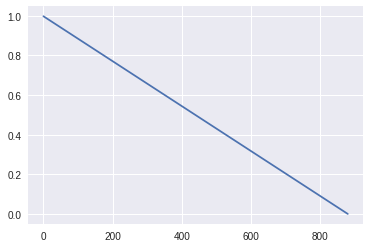

In [44]:
plt.plot(actual)

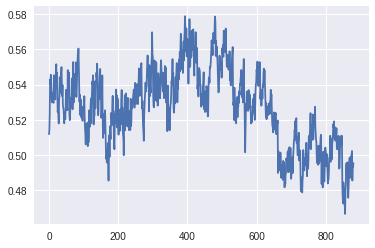

In [45]:
plt.plot(pred)

In [46]:
lasso_gs.best_params_

{'kpca__n_components': 11, 'model__alpha': 0.17782794100389229}

In [47]:
best_lasso.score(amzn_X_test, amzn_y_test)

0.041883082843607644

In [48]:
pred = lasso_gs.best_estimator_.predict(amzn_X_test)
actual = amzn_y_test

In [49]:
mean_absolute_error(actual, pred)

0.24531694322216438

In [50]:
mean_squared_error(actual, pred)

0.079830726351423784

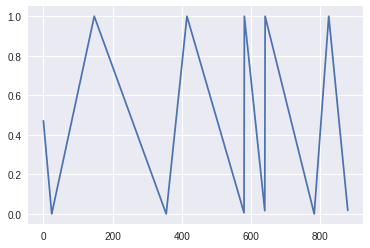

In [51]:
plt.plot(actual)

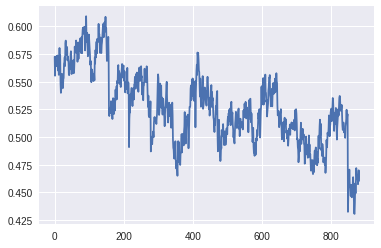

In [52]:
plt.plot(pred)

## Baseline SVR with KernelPCA

In [15]:
svr_pipe_params = {"kpca__n_components": np.arange(1,40, 5, dtype = int),
                  "model__kernel": ['poly', 'rbf', 'sigmoid']}

svr_pipe = Pipeline([("scaler", StandardScaler()),
                     ("kpca", KernelPCA()),
                     ("model", SVR())])

In [ ]:
svr_gs = GridSearchCV(svr_pipe, svr_pipe_params,
                     cv = 3,
                     verbose = 1)
svr_gs.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


In [ ]:
svr_gs.best_estimator_.fit(X_train, y_train)
svr_gs.best_estimator_.score(X_train, y_train)

In [ ]:
svr_gs.best_estimator_.score(apple_X_test, apple_y_test)

In [ ]:
pred = svr_gs.best_estimator_.predict(apple_X_test)
actual = apple_y_test

In [ ]:
mean_absolute_error(actual, pred)

In [ ]:
mean_squared_error(actual, pred)

In [ ]:
plt.plot(actual)

In [ ]:
plt.plot(pred)

In [ ]:
svr_gs.best_estimator_.score(amzn_X_test, amzn_y_test)

In [ ]:
pred = svr_gs.best_estimator_.predict(amzn_X_test)
actual = amzn_y_test

In [ ]:
mean_absolute_error(actual, pred)

In [ ]:
mean_squared_error(actual, pred)

In [ ]:
plt.plot(actual)

In [ ]:
plt.plot(pred)

## PCA Pipeline with RandomForestRegressor

In [ ]:
pca_pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('pca', PCA()),
    ('model', RandomForestRegressor())
])

In [ ]:
pca_params = {
    'pca__n_components': np.arange(1, 43, 3),
    'pca__svd_solver': ['full', 'arpack', 'randomized'],
    'model__n_estimators': [10, 50, 100]
}

In [ ]:
pca_gs = GridSearchCV(pca_pipeline, 
                      pca_params,
                      cv=3,
                      verbose = 1)

In [ ]:
pca_gs.fit(X_train, y_train)

In [ ]:
pca_gs.best_estimator_.fit(X_train, y_train)
pca_gs.best_estimator_.score(X_train, y_train)

In [ ]:
pca_gs.best_estimator_.score(X_test, y_test)

In [ ]:
pca_gs.best_params_

## KernelPCA Pipeline with RandomForestRegressor

In [ ]:
scaler = StandardScaler()
X_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [ ]:
kpca_pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('kpca', KernelPCA(random_state = 42)),
    ('model', RandomForestRegressor(random_state = 42))
])

In [ ]:
kpca_params = {
    'kpca__n_components': np.arange(1,40, 10, dtype = int),
    'kpca__kernel': ['poly','rbf', 'sigmoid'],
    'kpca__gamma': np.logspace(-3, 1, 4),
    'model__n_estimators': [10, 50, 100]
}

In [ ]:
kpca_gs = GridSearchCV(kpca_pipeline, 
                      kpca_params,
                      cv=3, verbose = 1)

In [ ]:
kpca_gs.fit(X_sc, y_train)

In [ ]:
kpca_gs.best_estimator_.fit(X_sc, y_train)
kpca_gs.best_estimator_.score(X_sc, y_train)

In [ ]:
kpca_gs.best_estimator_.score(X_test_sc, y_test)

In [ ]:
kpca_gs.best_params_

## KernelPCA Pipeline with Lasso

In [15]:
kpca_lasso_pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('kpca', KernelPCA(random_state = 42)),
    ('model', Lasso())
])

In [16]:
kpca_lasso_params = {
    'kpca__n_components': np.arange(1,40, 10, dtype = int),
    'kpca__kernel': ['poly','rbf', 'sigmoid'],
    'kpca__gamma': np.logspace(-3, 1, 4),
    'model__alpha': np.logspace(-2, 3, 5)
}

In [17]:
kpca_lasso_gs = GridSearchCV(kpca_lasso_pipeline, 
                      kpca_lasso_params,
                      cv=3, verbose = 1)

In [18]:
kpca_lasso_gs.fit(X_train, y_train)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed: 252.0min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kpca', KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
     fit_inverse_transform=False, gamma=None, kernel='linear',
     kernel_params=None, max_iter=None, n_components=None, n_jobs=1,
     ran...e=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kpca__n_components': array([ 1, 11, 21, 31]), 'kpca__kernel': ['poly', 'rbf', 'sigmoid'], 'kpca__gamma': array([  1.00000e-03,   2.15443e-02,   4.64159e-01,   1.00000e+01]), 'model__alpha': array([  1.00000e-02,   1.77828e-01,   3.16228e+00,   5.62341e+01,
         1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [19]:
kpca_lasso_gs.best_estimator_.fit(X_train, y_train)
kpca_lasso_gs.best_estimator_.score(X_train, y_train)

0.11377346139948574

In [20]:
kpca_lasso_gs.best_params_

{'kpca__gamma': 0.46415888336127775,
 'kpca__kernel': 'sigmoid',
 'kpca__n_components': 11,
 'model__alpha': 0.01}

In [22]:
pred = kpca_lasso_gs.best_estimator_.predict(apple_X_test)
actual = apple_y_test

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [24]:
mean_absolute_error(actual, pred)

0.24095902485311232

In [25]:
mean_squared_error(actual, pred)

0.075389484653764799

In [26]:
kpca_lasso_gs.best_estimator_.score(apple_X_test, apple_y_test)

0.091212864869987254

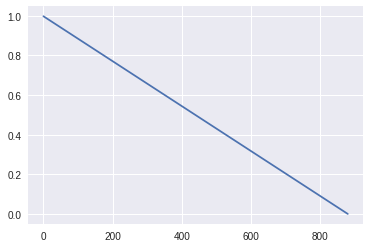

In [29]:
plt.plot(actual)

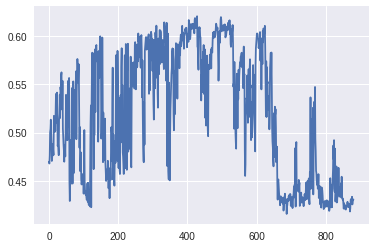

In [28]:
plt.plot(pred)

In [30]:
pred = kpca_lasso_gs.best_estimator_.predict(amzn_X_test)
actual = amzn_y_test

In [31]:
mean_absolute_error(actual, pred)

0.24443900611012304

In [32]:
mean_squared_error(actual, pred)

0.079844520404277267

In [33]:
kpca_lasso_gs.best_estimator_.score(amzn_X_test, amzn_y_test)

0.041717528601536769

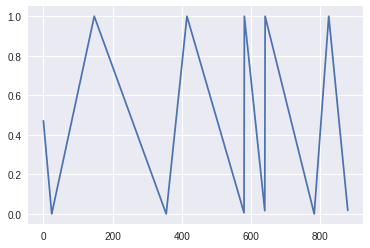

In [34]:
plt.plot(actual)

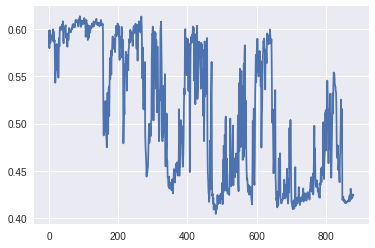

In [35]:
plt.plot(pred)

## Test

In [ ]:
kpca = KernelPCA(n_components = 5, kernel="rbf", gamma = 0.25, random_state = 42, remove_zero_eig=True, eigen_solver = 'arpack')
projected = kpca.fit_transform(X_sc)
inputs = pd.DataFrame(projected)
inputs = inputs.as_matrix()

In [ ]:
test_kpca = KernelPCA(n_components = 5, kernel="rbf", gamma = 0.25, random_state = 42, remove_zero_eig=True, eigen_solver = 'arpack')
test_projected = kpca.fit_transform(X_test_sc)
test_inputs = pd.DataFrame(test_projected)
test_inputs = test_inputs.as_matrix()

In [ ]:
pipeline = Pipeline([
    ('svr', SVR())
])

In [ ]:
params = {
    'svr__kernel': ['sigmoid', 'poly', 'rbf'],
    'svr__epsilon':[0, 0.1, 0.3, 0.5, 0.7, 0.9],
    'svr__degree':np.arange(1, 10, 1),
    'svr__gamma':[0.1, 0.25, 0.4, 0.5, 65, 75, 0.9, 1],
    #'svr__coef0':[0.1, 0.25, 0.4, 0.5, 65, 75, 0.9, 1],
}

In [ ]:
gs = GridSearchCV(pipeline, 
                      params,
                      cv=5,
                      n_jobs = -1)

In [ ]:
gs.fit(inputs, y_train)

In [ ]:
gs.score(inputs, y_train)

In [ ]:
gs.score(test_inputs, y_test)

In [ ]:
gs.best_params_

## KernelPCA Pipeline with SupportVectorClassifier

In [ ]:
svc_pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('kpca', KernelPCA()),
    ('svc', SVC(random_state = 42))
])

In [ ]:
svc_params = {
    'kpca__n_components': [2, 3, 4, 5, 6, 7],
    'kpca__kernel': ['rbf', 'sigmoid'], #'cosine',
    'kpca__gamma': [0.1, 0.25, 0.4, 0.5, 65, 75, 0.9, 1],
    'svc__kernel': ['sigmoid', 'poly', 'rbf'] #'linear',
}

In [ ]:
svc_gs = GridSearchCV(svc_pipeline, 
                      svc_params,
                      cv=5,
                      n_jobs = -1)

In [ ]:
svc_gs.fit(X_train, y_train_buy)

In [ ]:
svc_gs.score(X_train, y_train_buy)

In [ ]:
svc_gs.score(X_test, y_test_buy)

In [ ]:
svc_gs.best_params_

In [ ]:
pred = svc_gs.predict(X_test)
actual = y_test_buy.as_matrix()

In [ ]:
true_positive = 0
false_positive = 0
true_negative = 0
false_negative = 0

for values in range(len(pred)):
    if pred[values] == actual[values] and pred[values] == 1:
        true_positive += 1
    if pred[values] == actual[values] and pred[values] == 0:
        true_negative += 1
    if pred[values] != actual[values] and pred[values] == 1:
        false_positive += 1
    if pred[values] != actual[values] and pred[values] == 0:
        false_negative += 1

In [ ]:
true_positive_rate = true_positive/(true_positive + false_negative)
false_positive_rate = false_positive/(false_positive + true_negative)
true_negative_rate = true_negative/(true_negative + false_positive)
false_negative_rate = false_negative/(true_positive + false_negative)

In [ ]:
display("True Positive: " + str(true_positive_rate))
display("False Positive: " + str(false_positive_rate))
display("True Negative: " + str(true_negative_rate))
display("False Negative: " + str(false_negative_rate))

In [ ]:
try:
    svc_gs.fit(X_train, y_train_sell)
except:
    pass

In [ ]:
svc_gs.score(X_train, y_train_sell)

In [ ]:
svc_gs.score(X_test, y_test_sell)

In [ ]:
svc_gs.best_params_

In [ ]:
pred = svc_gs.predict(X_test)
actual = y_test_sell.as_matrix()

In [ ]:
true_positive = 0
false_positive = 0
true_negative = 0
false_negative = 0

for values in range(len(pred)):
    if pred[values] == actual[values] and pred[values] == 1:
        true_positive += 1
    if pred[values] == actual[values] and pred[values] == 0:
        true_negative += 1
    if pred[values] != actual[values] and pred[values] == 1:
        false_positive += 1
    if pred[values] != actual[values] and pred[values] == 0:
        false_negative += 1
        
true_positive_rate = true_positive/(true_positive + false_negative)
false_positive_rate = false_positive/(false_positive + true_negative)
true_negative_rate = true_negative/(true_negative + false_positive)
false_negative_rate = false_negative/(true_positive + false_negative)

In [ ]:
display("True Positive: " + str(true_positive_rate))
display("False Positive: " + str(false_positive_rate))
display("True Negative: " + str(true_negative_rate))
display("False Negative: " + str(false_negative_rate))

In [ ]:
svc_gs.fit(X_train, y_train_hold)

In [ ]:
svc_gs.score(X_train, y_train_hold)

In [ ]:
svc_gs.score(X_test, y_test_hold)

In [ ]:
svc_gs.best_params_

In [ ]:
pred = svc_gs.predict(X_test)
actual = y_test_hold.as_matrix()

In [ ]:
true_positive = 0
false_positive = 0
true_negative = 0
false_negative = 0

for values in range(len(pred)):
    if pred[values] == actual[values] and pred[values] == 1:
        true_positive += 1
    if pred[values] == actual[values] and pred[values] == 0:
        true_negative += 1
    if pred[values] != actual[values] and pred[values] == 1:
        false_positive += 1
    if pred[values] != actual[values] and pred[values] == 0:
        false_negative += 1
        
true_positive_rate = true_positive/(true_positive + false_negative)
false_positive_rate = false_positive/(false_positive + true_negative)
true_negative_rate = true_negative/(true_negative + false_positive)
false_negative_rate = false_negative/(true_positive + false_negative)

In [ ]:
display("True Positive: " + str(true_positive_rate))
display("False Positive: " + str(false_positive_rate))
display("True Negative: " + str(true_negative_rate))
display("False Negative: " + str(false_negative_rate))

## KernelPCA Pipeline with BaggingRegressor and SupportVectorRegressor

In [ ]:
bag_kpca_pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('kpca', KernelPCA()),
    ('svr', BaggingRegressor(SVR()))
])

In [ ]:
bag_kpca_params = {
    'kpca__n_components': np.arange(2, 11, 1),
    'kpca__kernel': ['poly', 'rbf', 'sigmoid', 'cosine'],
    'svr__base_estimator__kernel': ['sigmoid', 'poly', 'rbf'],
    'svr__n_estimators': np.arange(5, 50, 5),
}

In [ ]:
bag_kpca_gs = GridSearchCV(bag_kpca_pipeline, 
                      bag_kpca_params,
                      cv=5,
                      n_jobs = -1)

In [ ]:
bag_kpca_gs.fit(X_train, y_train)

In [ ]:
bag_kpca_gs.score(X_train, y_train)

In [ ]:
bag_kpca_gs.score(X_test, y_test)

In [ ]:
bag_kpca_gs.best_params_

## FastICA Pipeline with SupportVectorRegressor

In [36]:
ica_pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('ica', FastICA()),
    ('model', Lasso())
])

In [37]:
ica_params = {
    'ica__n_components': np.arange(1,40, 10, dtype = int),
    'ica__algorithm': ['parallel', 'deflation'],
    'ica__fun': ['logcosh', 'exp', 'cube'],
    'model__alpha': np.logspace(-2, 3, 5)
}

In [38]:
ica_gs = GridSearchCV(ica_pipeline, 
                      ica_params,
                      cv=3,
                      verbose = 1)

In [39]:
ica_gs.fit(X_train, y_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed: 43.1min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ica', FastICA(algorithm='parallel', fun='logcosh', fun_args=None, max_iter=200,
    n_components=None, random_state=None, tol=0.0001, w_init=None,
    whiten=True)), ('model', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'ica__n_components': array([ 1, 11, 21, 31]), 'ica__algorithm': ['parallel', 'deflation'], 'ica__fun': ['logcosh', 'exp', 'cube'], 'model__alpha': array([  1.00000e-02,   1.77828e-01,   3.16228e+00,   5.62341e+01,
         1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [40]:
ica_gs.best_estimator_.fit(X_train, y_train)
ica_gs.best_estimator_.score(X_train, y_train)

0.0

In [41]:
ica_gs.best_estimator_.score(apple_X_test, apple_y_test)

-0.0089546641694082663

In [42]:
ica_gs.best_params_

{'ica__algorithm': 'parallel',
 'ica__fun': 'logcosh',
 'ica__n_components': 1,
 'model__alpha': 0.01}

In [ ]:
pred = ica_gs.best_estimator_.predict(apple_X_test)
actual = apple_y_test

## FastICA Pipeline with BaggingRegressor and SupportVectorRegressor

In [43]:
bag_ica_pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('ica', FastICA()),
    ('svr', BaggingRegressor(SVR()))
])

In [44]:
bag_ica_params = {
    'ica__n_components': np.arange(2, 11, 1),
    'ica__algorithm': ['parallel', 'deflation'],
    'ica__fun': ['logcosh', 'exp', 'cube'],
    'svr__base_estimator__kernel': ['sigmoid', 'poly', 'rbf'],
    'svr__n_estimators': np.arange(5, 50, 5),
}

In [ ]:
bag_ica_gs = GridSearchCV(bag_ica_pipeline, 
                      bag_ica_params,
                      cv=5,
                      n_jobs = -1)

In [ ]:
bag_ica_gs.fit(X_train, y_train)

In [ ]:
bag_ica_gs.score(X_train, y_train)

In [ ]:
bag_ica_gs.score(apple_X_test, apple_y_test)

In [ ]:
bag_ica_gs.best_params_